# Evaluation of the participant questionnaire
## Data management

In [2]:
#Import Statements
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import chardet

sns.set() # Setting seaborn as default style
sns.set_theme()

# declare global helpers
condition_values = ['0ms','10ms','400ms','10ms echo','400ms echo']
groupnames = [0,1,2,3,4]
browsernames = ["MSIE", "Firefox", "Safari", "Chrome", "Opera"]

In [3]:
# 1. Time results were received.
# 2. MD5 hash of participant's IP address.
# 3. Controller name.
# 4. Item number.
# 5. Element number.
# 6. Type.
# 7. Group.
# 8. PennElementType.
# 9. PennElementName.
# 10. Parameter.
# 11. Value.
# 12. EventTime.
# 13. Comments.
df = pd.read_csv('results_audiovisual_exp.txt',
                 sep = ',',
                 comment='#', 
                 header=None,
                 names = ['time','hash', 'controller','item','element', 'type', 'group','petype','pename','parameter', 'value', 'event_time', 'comments'],
                engine = 'python')

In [4]:
df.info()
print([*df])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        1498 non-null   int64  
 1   hash        1498 non-null   object 
 2   controller  1498 non-null   object 
 3   item        1498 non-null   int64  
 4   element     1498 non-null   int64  
 5   type        1498 non-null   object 
 6   group       0 non-null      float64
 7   petype      1498 non-null   object 
 8   pename      1498 non-null   object 
 9   parameter   1489 non-null   object 
 10  value       1373 non-null   object 
 11  event_time  1489 non-null   float64
 12  comments    765 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 152.3+ KB
['time', 'hash', 'controller', 'item', 'element', 'type', 'group', 'petype', 'pename', 'parameter', 'value', 'event_time', 'comments']


In [14]:
df.tail(50)

,time,hash,controller,item,element,type,group,petype,pename,parameter,value,event_time,comments
1448,1619618572,0999c60331b1561f4fb890a1f8b34145,PennController,4,0,audio_volume,NaN,PennController,3,_Trial_,Start,1.619619e+12,NaN
1449,1619618572,0999c60331b1561f4fb890a1f8b34145,PennController,4,0,audio_volume,NaN,Scale,answer1,Choice,Ja,1.619619e+12,NaN
1450,1619618572,0999c60331b1561f4fb890a1f8b34145,PennController,4,0,audio_volume,NaN,Scale,answer2,Choice,Ja,1.619619e+12,NaN
1451,1619618572,0999c60331b1561f4fb890a1f8b34145,PennController,4,0,audio_volume,NaN,PennController,3,_Trial_,End,1.619619e+12,NaN
1452,1619620782,d25f9b956da56111037a0eacb21a9eff,PennController,1,0,intro1,NaN,PennController,0,_Trial_,Start,1.619621e+12,NaN
1453,1619620782,d25f9b956da56111037a0eacb21a9eff,PennController,1,0,intro1,NaN,PennController,0,_Trial_,End,1.619621e+12,NaN
1454,1619620782,d25f9b956da56111037a0eacb21a9eff,PennController,2,0,intro2,NaN,PennController,1,_Trial_,Start,1.619621e+12,NaN
1455,1619620782,d25f9b956da56111037a0eacb21a9eff,PennController,2,0,intro2,NaN,Html,consent,consent,checked,1.619621e+12,checkbox
1456,1619620782,d25f9b956da56111037a0eacb21a9eff,PennController,2,0,intro2,NaN,PennController,1,_Trial_,End,1.619621e+12,NaN
1457,1619620782,d25f9b956da56111037a0eacb21a9eff,PennController,3,0,personal,NaN,PennController,2,_Trial_,Start,1.619621e+12,NaN


## Gender

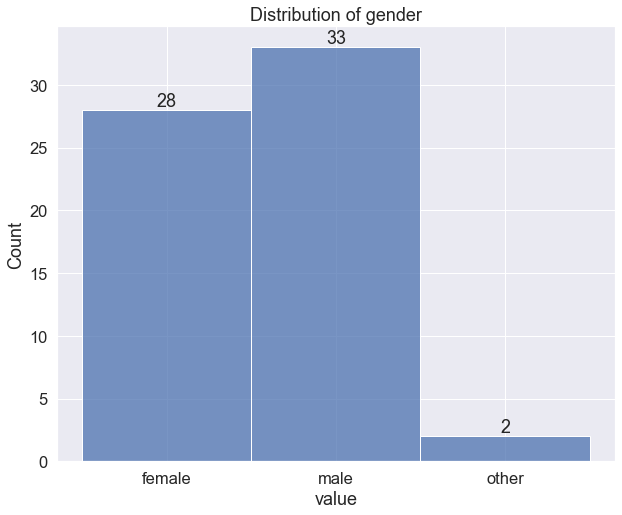

In [6]:
#display all the genders
list(df[df['parameter'] == 'gender']['value'])
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['parameter'] == 'gender'],x = 'value')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Distribution of gender')

plt.savefig("gender_dist.png", dpi=300, bbox_inches='tight')

## Vision

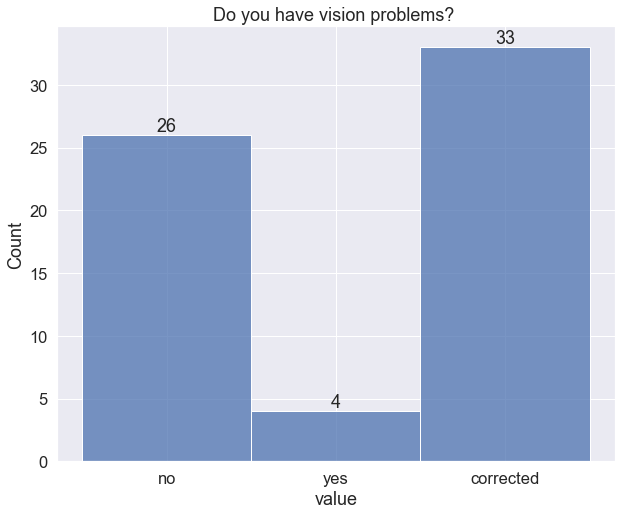

In [17]:
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['parameter'] == 'vision'],x = 'value')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Do you have vision problems? ')

plt.savefig("vision_dist.png", dpi=300, bbox_inches='tight')

['24', '24', '24', '24', '23', '38', '24', '333', '333', '21', '333', '25', '21', '23', '19', '22', '20', '23', '20', '21', '30', '30', '22', '23', '21', '24', '23', '23', '30', '23']


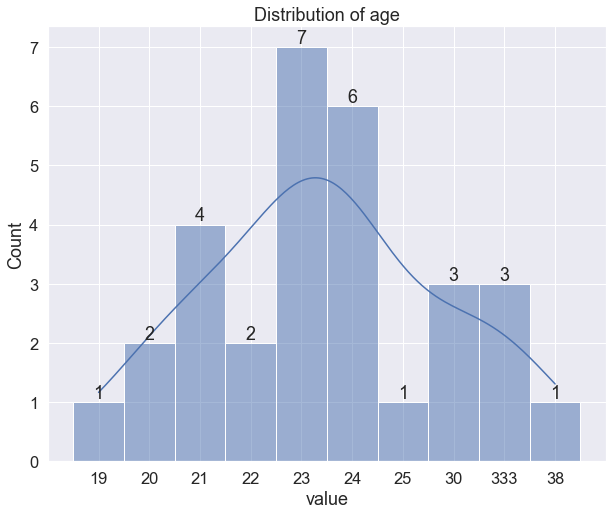

In [7]:
#display all the ages
print(list(df[df['parameter'] == 'age']['value']))
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.set(font_scale=1.5)

ages = df[df['parameter'] == 'age'].sort_values(by='value')

ax = sns.histplot(x = ages['value'],
                 kde = True)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.title('Distribution of age')
plt.savefig("age_dist.png", dpi=300, bbox_inches='tight')

## Comments

In [8]:
#display all the comments
list(df[df['parameter'] == 'comment']['value'].dropna())

['test',
 'go Aron-Schmaron!',
 'als Kind häufig Mittelohrentzündungen gehabt und nur knapp Paukenröhrchen entkommen%2C wahrscheinlich nicht diagnostiziertes eingeschränktes Hörvermögen...',
 'test2',
 'test',
 'Es ist schönes Wetter und ich freue mich auf die Studie.']

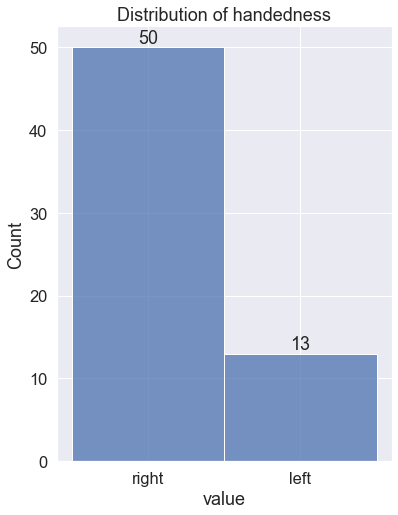

In [13]:
fig = plt.gcf()
fig.set_size_inches(6, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['parameter'] == 'handedness'],x = 'value')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


plt.title('Distribution of handedness')
plt.savefig("handedness_dist.png", dpi=300, bbox_inches='tight')

## Participants to exclude

In [10]:
#Messages of people who answered psych
dfp =df.loc[(df['parameter'] == 'psych') & (df['value'] != 'no')]
dfp['value'].dropna()

109           tese
784           test
805           test
1071    Depression
Name: value, dtype: object

In [11]:
#Messages of people who answered asd
dfp =df.loc[(df['parameter'] == 'asd') & (df['value'] != 'no')]
dfp['value']

793    yes
814    yes
Name: value, dtype: object